Exercício 2: Utilização dos softwares OCTAVE, SCILAB e MATLAB para visualização de superfícies tridimensionais (meshgrid, mesh, surf) e curvas de níveis (contour) para o problema de otimização do sistema de extração por solvente. Arquivos Aulas_Octave/extrator.m, Aulas_Scilab/extrator.sce e Aulas_Matlab/extrator.m.

a = 130.0
b = 0.5
c = 4000.0
d = 25.0


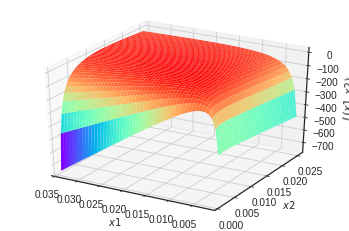

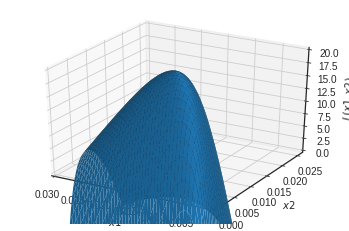

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

Ps = 0.4 #R$/kg-soluto
Px = 0.01 #R$/kg-solvente
F = 10000 #kg-agua/h
xo = 0.02 #kg-soluto/kg-agua
#s=7e-4   #kg-solvente/kg-agua
s = 0 #kg-solvente/kg-agua
m = 4 #kg-agua/kg-solvente

a = F*((Ps*xo)+((2*Px)/m)-(Px*s))
b = (F*Px*xo)/m
c = F*Ps
d = (F*Px)/m

print("a =", a) #a=130
print("b =", b) #b=0.5
print("c =", c) #c=4000
print("d =", d) #d=25

#Plot surface 3d:

from matplotlib import cm

x1 = np.linspace(0.001, 0.035, 50)
x2 = np.linspace(0.001, 0.025, 50)
X, Y = np.meshgrid(x1, x2)

Z = a - (b/X) - (c*Y) - d*(X/Y)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z, cmap=cm.rainbow)

ax.set_xlim(0.035,0.001)
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$L(x1,x2)$');

#Pelo fato do domínio de (x1,x2) ser muito extenso, o matplotlib seta um 
#intervalo de [0,-700] para o eixo z, 
#então uma opção para resolver este problema é manualmente escolher 
#a faixa de z para [20,0] para poder 
#"enxergar" o máximo do lucro L(x1,x2).

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z);
ax.set_xlim(0.03,0.001)  #faixa de x1 arbitrária
ax.set_zlim(0,20)        #faixa de z =[0,20]
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$L(x1,x2)$');

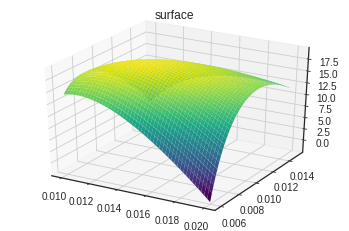

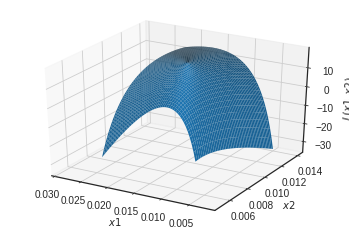

In [10]:
#Outra opção é restringir o domínio de (x1,x2):

x1 = np.linspace(0.01, 0.02, 50)
x2 = np.linspace(0.006, 0.015, 50)
X, Y = np.meshgrid(x1, x2)

Z = a - (b/X) - (c*Y) - d*(X/Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

#Mudando o domínio novamente, mas restringindo x1 no gráfico:

x1 = np.linspace(0.005, 0.022, 50)
x2 = np.linspace(0.005, 0.014, 50)
X, Y = np.meshgrid(x1, x2)

Z = a - (b/X) - (c*Y) - d*(X/Y)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z);
ax.set_xlim(0.03,0.001)       #faixa de x1 arbitrária
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$L(x1,x2)$');

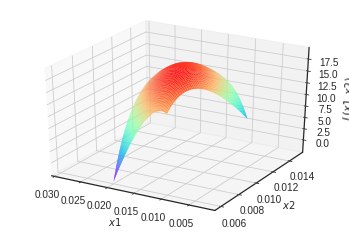

In [5]:
#Melhorando ainda mais a apresentação da última superfície:
#selecionando uma faixa específica para o eixo x1
x1 = np.linspace(0.01, 0.02, 50)
x2 = np.linspace(0.006, 0.015, 50)
X, Y = np.meshgrid(x1, x2)

Z = a - (b/X) - (c*Y) - d*(X/Y)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z, cmap=cm.rainbow)

ax.set_xlim(0.03,0.001)        #faixa de x1 arbitrária
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$L(x1,x2)$');

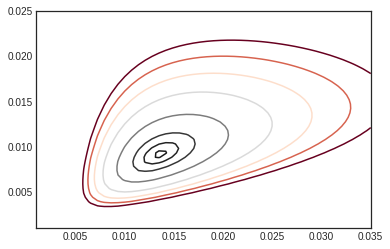

In [8]:
#Plot density - contour:

plt.contour(X, Y, Z, [-5,0,5,10,15,18,19,19.4], cmap='RdGy');

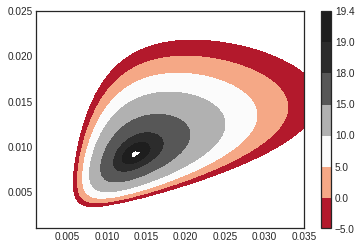

In [9]:
#Plot density - contour (with colobar):

plt.contourf(X, Y, Z, [-5,0,5,10,15,18,19,19.4], cmap='RdGy')
plt.colorbar();

Text(0, 0.5, '$x2$')

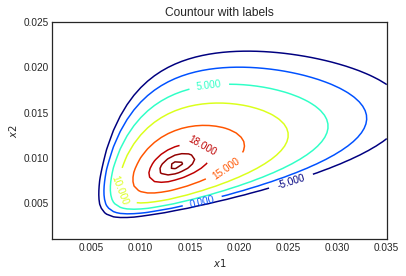

In [18]:
#Plot density - contour (with labels):

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, [-5,0,5,10,15,18,19,19.4], cmap='jet')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Countour with labels')
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')

In [2]:
n = np.shape(X)
n

(50, 50)

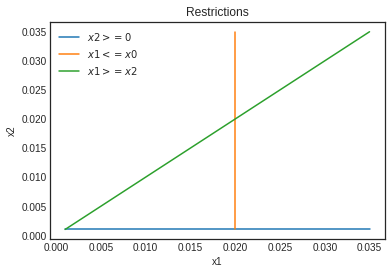

In [22]:
#Drawing the lines of the restrictions

x1 = np.linspace(0.001, 0.035, 50)
x2 = np.linspace(0.001, 0.035, 50)
X, Y = np.meshgrid(x1, x2)

Z = a - (b/X) - (c*Y) - d*(X/Y)

r1 = 0.02*np.ones((n[0],1)) # x0 = 0.02
r2 = 0.001*np.ones((n[1],1)) # theoretically it should be 0, but we set at 1e-3 just to see it on graph

x11 = np.reshape(x1, (50, 1))
x21 = np.reshape(x2, (50, 1))

p = min(n);
x12 = np.reshape(x1, (p, 1))
x22 = np.reshape(x2, (p, 1))


plt.plot(x11,r2, label ='$x2 >= 0$') # horizontal line at x2=1e-3 (restriction x2>0)
plt.plot(r1,x21, label ='$x1 <= x0$') # vertical line at x1=0.02 (restriction x1<=x0)
plt.plot(x12,x22, label ='$x1 >= x2$') # diagonal line where x1=x2 (restriction x1>=x2)

# título do gráfico: função title
plt.title('Restrictions')

# legendas dos eixos: funções xlabel e ylabel
plt.xlabel('x1')
plt.ylabel('x2')

# legendas das curvas: função legend
plt.legend();

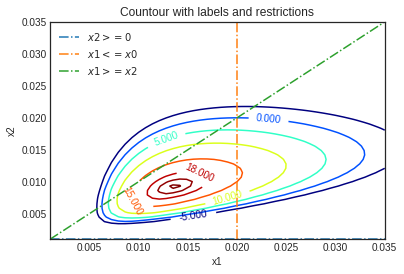

In [24]:
#Plot density - contour (with labels and restrictions):

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, [-5,0,5,10,15,18,19,19.4], cmap='jet')
ax.clabel(CS, inline=1, fontsize=10)

plt.plot(x11,r2, '-.', label ='$x2 >= 0$') # horizontal line at x2=1e-3 (restriction x2>0)
plt.plot(r1,x21, '-.', label ='$x1 <= x0$') # vertical line at x1=0.02 (restriction x1<=x0)
plt.plot(x12,x22, '-.', label ='$x1 >= x2$') # diagonal line where x1=x2 (restriction x1>=x2)

# título do gráfico: função title
plt.title('Countour with labels and restrictions')

# legendas dos eixos: funções xlabel e ylabel
plt.xlabel('x1')
plt.ylabel('x2')

# legendas das curvas: função legend
plt.legend();

In [7]:
r2

array([[0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001],
       [0.0001]])

In [9]:
x1

array([0.001     , 0.00169388, 0.00238776, 0.00308163, 0.00377551,
       0.00446939, 0.00516327, 0.00585714, 0.00655102, 0.0072449 ,
       0.00793878, 0.00863265, 0.00932653, 0.01002041, 0.01071429,
       0.01140816, 0.01210204, 0.01279592, 0.0134898 , 0.01418367,
       0.01487755, 0.01557143, 0.01626531, 0.01695918, 0.01765306,
       0.01834694, 0.01904082, 0.01973469, 0.02042857, 0.02112245,
       0.02181633, 0.0225102 , 0.02320408, 0.02389796, 0.02459184,
       0.02528571, 0.02597959, 0.02667347, 0.02736735, 0.02806122,
       0.0287551 , 0.02944898, 0.03014286, 0.03083673, 0.03153061,
       0.03222449, 0.03291837, 0.03361224, 0.03430612, 0.035     ])

In [13]:
x11 = np.reshape(x1, (50, 1))
x11

array([[0.001     ],
       [0.00169388],
       [0.00238776],
       [0.00308163],
       [0.00377551],
       [0.00446939],
       [0.00516327],
       [0.00585714],
       [0.00655102],
       [0.0072449 ],
       [0.00793878],
       [0.00863265],
       [0.00932653],
       [0.01002041],
       [0.01071429],
       [0.01140816],
       [0.01210204],
       [0.01279592],
       [0.0134898 ],
       [0.01418367],
       [0.01487755],
       [0.01557143],
       [0.01626531],
       [0.01695918],
       [0.01765306],
       [0.01834694],
       [0.01904082],
       [0.01973469],
       [0.02042857],
       [0.02112245],
       [0.02181633],
       [0.0225102 ],
       [0.02320408],
       [0.02389796],
       [0.02459184],
       [0.02528571],
       [0.02597959],
       [0.02667347],
       [0.02736735],
       [0.02806122],
       [0.0287551 ],
       [0.02944898],
       [0.03014286],
       [0.03083673],
       [0.03153061],
       [0.03222449],
       [0.03291837],
       [0.033